In [1]:
import csv
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Fixing curropted columns

In [2]:
class FileManupulation:

    def cleanRows(self,path):
        with open(path, 'rb') as infile: 
            data_in = infile.readlines()
        with open (path, 'wb') as outfile:
            outfile.writelines(data_in[4:])
    
    def addTargetColumn(self):
        main_folder = os.chdir("E:/2.ML-DATASETS/AREM")
        sub_folders = os.listdir()
        for i in sub_folders:
            os.chdir("E:/2.ML-DATASETS/AREM/"+i)
            for file in os.listdir():
                path = "E:/2.ML-DATASETS/AREM/"+i+"/"+file
                self.cleanRows(path)
                df = pd.read_csv(path)
                df["class"] = i
                df.to_csv(path)
                
    def mergeAllFiles(self):
        resFile = []
        main_folder = os.chdir("E:/2.ML-DATASETS/AREM")
        sub_folders = os.listdir()
        for i in sub_folders:
            os.chdir("E:/2.ML-DATASETS/AREM/"+i)
            for file in os.listdir():
                path = "E:/2.ML-DATASETS/AREM/"+i+"/"+file
                resFile.append(path)
        return resFile
        

In [3]:
# fileManupulate = FileManupulation()
# fileManupulate.addTargetColumn()

In [4]:
fileManupulate = FileManupulation()
mainFile = fileManupulate.mergeAllFiles()
df = pd.concat(map(pd.read_csv,mainFile))
df

,Unnamed: 0,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,class
0,0.0,0,43.67,0.47,24.75,0.43,30.00,0.00,bending1
1,1.0,250,43.33,0.47,25.33,0.47,30.00,0.00,bending1
2,2.0,500,42.75,0.83,25.25,0.83,30.50,0.50,bending1
3,3.0,750,41.75,0.43,20.50,3.35,30.75,0.83,bending1
4,4.0,1000,42.50,0.50,20.75,4.55,31.75,0.43,bending1
...,...,...,...,...,...,...,...,...,...
475,475.0,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
476,476.0,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
477,477.0,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
478,478.0,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [5]:
df1 = df.drop(columns=["Unnamed: 0"])
df['avg_rss12'].isnull().sum()

480

In [6]:
df2 = df1

In [7]:
df2.rename(columns={"# Columns: time":"time"},inplace = True)
df2.columns

Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'class'],
      dtype='object')

# --------------Exploratory Data Analysis-------------

## One hot encoding


In [8]:
df2["class"].value_counts().sort_values(ascending = False)

lying       7200
walking     7200
standing    7200
cycling     7200
sitting     7199
bending1    2880
bending2    2880
Name: class, dtype: int64

In [9]:
one_hot_encoded_data = pd.get_dummies(df2,columns = ["class"])

## Handling missing values
    1.Missing completly at random (MCAR):
        probabilty of missing is same for all the observation, There should be no relationship btwn missing value columns 
        here we can use Mean, Median, Mode technique
    2. Missing data not at random(MNAR):
        There is absolutly some relationship btwn missing value columns
--------------------------------------------------------------------------------------------------------------------
    1. Random sample Imputation :
        Takes random observation from the dataset and we use this observation ro replace Nan values, it can be use when MCAR

###### In this data set out of 6 "bending-2" class 1 of the class has complete NaN values  so we need to fill those Nan values by taking the mean or median or mode or random samples of other bending2 class and replace those values with Nan 

In [11]:
df3 = df1.loc[df1["class"] == "bending2"]

In [12]:
df3.dropna(inplace = True)

<ipython-input-12-3e9cd46e1d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace = True)


In [13]:
df3.drop(['class','time'],axis = 1)

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,23.75,0.43,24.00,0.00,24.67,0.47
1,22.67,0.94,24.00,0.00,24.67,0.94
2,21.33,0.47,24.00,0.00,24.75,0.83
3,21.00,0.00,24.00,0.00,25.25,1.09
4,23.00,0.71,23.75,0.43,24.75,0.83
...,...,...,...,...,...,...
475,27.00,0.00,14.00,0.00,6.50,0.50
476,27.00,0.00,15.00,0.00,4.00,1.00
477,27.00,0.00,14.25,0.83,4.00,2.00
478,27.00,0.00,13.33,1.25,1.50,0.50


In [15]:
def fillNas(col,tech):
    for i in col:
        if tech == "mean":
            mean = df3[i].mean()
            df2[i].fillna(mean,inplace=True)
        elif tech == "median":
            median = df2[i].median()
            df2[i].fillna(median,inplace=True)
        elif tech == "randomSampleImputation":
            pass

null_columns = df2.columns[df2.isnull().any()]
fillNas(null_columns,"median")

In [16]:
df2.isnull().sum()

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
class        0
dtype: int64

## Outliers
Detecting outliers :
1. Zscore
2. IQR
3.

<AxesSubplot:>

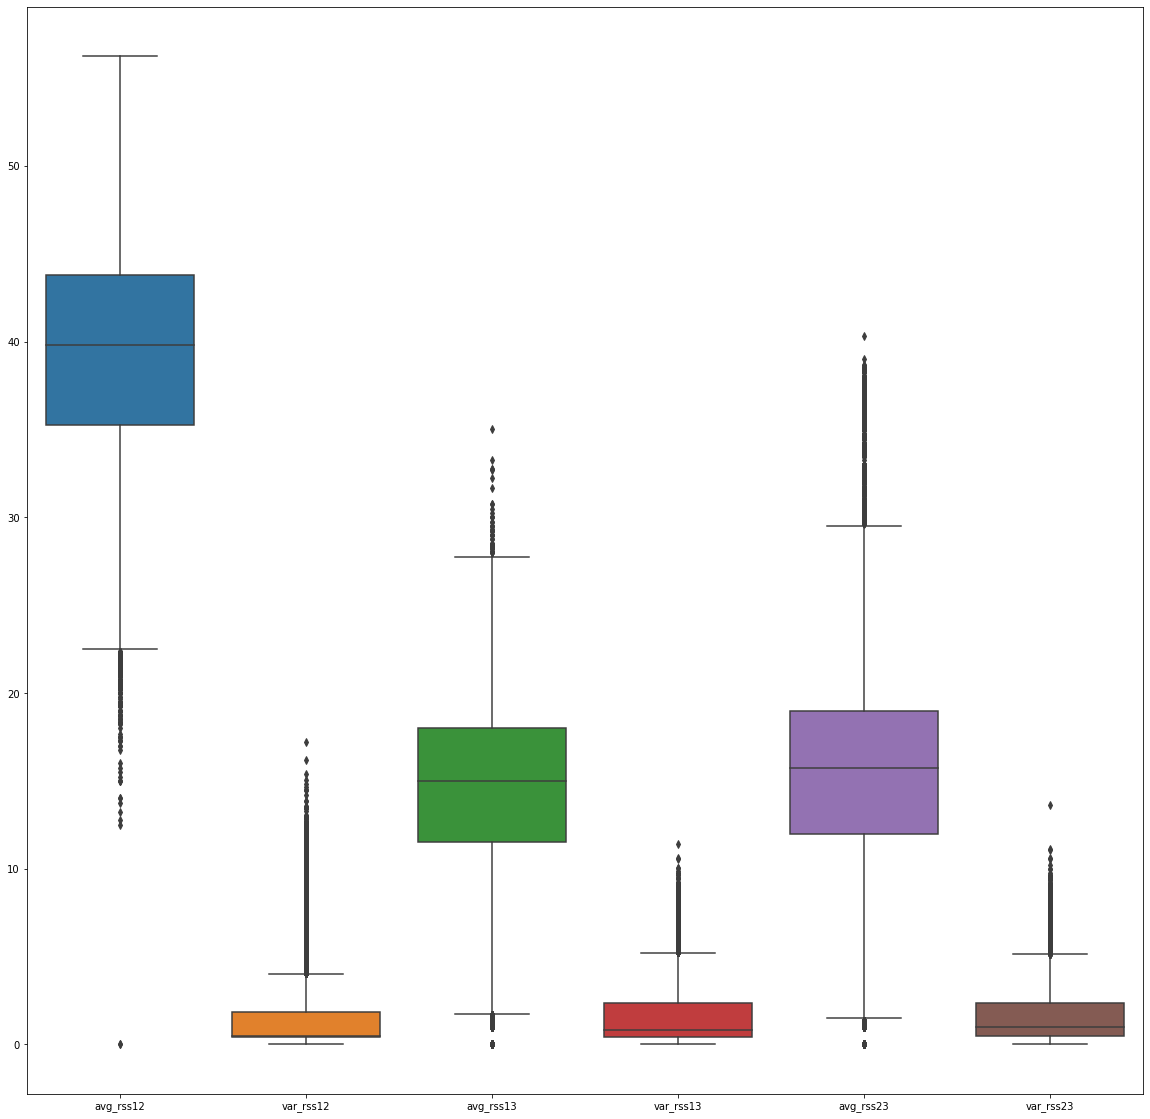

In [17]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df2,ax = ax)

In [50]:
def detectOutliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    return lower_bound,upper_bound

lower_bound,upper_bound = detectOutliers(df2)

def removeOutliers(lower_bound,upper_bound):
    for i in df2.columns[1:-2]:
        df2[i] 
    

In [68]:
for i in df2.columns[1:-2]:
    print(df2[i])

0      43.67
1      43.33
2      42.75
3      41.75
4      42.50
       ...  
475    31.50
476    27.33
477    37.80
478    33.75
479    32.67
Name: avg_rss12, Length: 41759, dtype: float64
0      0.47
1      0.47
2      0.83
3      0.43
4      0.50
       ... 
475    1.66
476    1.25
477    7.68
478    1.30
479    3.09
Name: var_rss12, Length: 41759, dtype: float64
0      24.75
1      25.33
2      25.25
3      20.50
4      20.75
       ...  
475    12.50
476    11.33
477    14.20
478    15.75
479    18.67
Name: avg_rss13, Length: 41759, dtype: float64
0      0.43
1      0.47
2      0.83
3      3.35
4      4.55
       ... 
475    3.20
476    0.94
477    2.48
478    5.21
479    0.47
Name: var_rss13, Length: 41759, dtype: float64
0      30.00
1      30.00
2      30.50
3      30.75
4      31.75
       ...  
475    14.25
476    20.00
477    17.25
478    16.50
479    14.00
Name: avg_rss23, Length: 41759, dtype: float64


In [67]:
for i,j in lower_bound.items():
    print(i,j)

avg_rss12 22.462500000000002
var_rss12 -1.7300000000000002
avg_rss13 1.75
var_rss13 -2.45
avg_rss23 1.5
var_rss23 -2.3149999999999995


In [29]:
q1 = df2.quantile(0.25)

In [31]:
q2 = df2.quantile(0.75)

In [40]:
iqr = q2-q1

In [42]:
ob = q1-(1.5*iqr)

In [46]:
# importing pandas as pd
import pandas as pd

# Creating the dataframe
d = pd.DataFrame({"A":[1, 5, 3, 4, 2],
"B":[3, 2, 4, 3, 4],
"C":[2, 2, 7, 3, 4],
"D":[4, 3, 6, 12, 7]})

d1 = pd.DataFrame({"A":[10, 5, 93, 4, 2],
"B":[23, 2, 47, 3, 4],
"C":[2, 2, 57, 3, 4],
"D":[4, 43, 6, 1, 7]})
